In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

""" =========== Zhaohui Yang =========== """
def zhy_convergence(L, gamma, xi, epsilon, eta):
    a = (2 * L ** 2) / (gamma ** 2 * xi) * math.log(1 / epsilon)
    result = a / (1 - eta)
    return result


""" =========== SCFL =========== """
def scfl_convergence(U, L, mu, eta, epsilon_0, tau_u, sample_skip, xi):
    """
    Attributes:
    -   epsilon_0:
    -   U:     Number of users
    -   L:     Lipschitz-Smooth
    -   gamma: Strongly Convex
    -   eta:   Learning Rate

    Return:
    -   min_round: minimum number of rounds required for the convergence
    """
    Transition_coeff = 1
    Data_entropy = 2.65
    MI_Sampling = calculate_MI_sampling(sample_skip, tau_u, Data_entropy, Transition_coeff)
    Psi = calculate_psi(Data_entropy, MI_Sampling)
    numerator = 2 * U * L**2 * xi
    denominator = xi * (L + 2) * Psi + (xi * L) / U - eta * mu
    min_round = math.log(1 / epsilon_0) * numerator / denominator
    return min_round

def calculate_psi(H_Z, I_Zz):
    H_Z_term = 2 ** H_Z
    inner_term = 2 * (H_Z - I_Zz)
    result = H_Z_term * math.sqrt(inner_term)
    return result

def calculate_MI_sampling(sample_n, tau_u, c_0, c_1):
    MI = c_0 * math.exp(-c_1 * sample_n * tau_u)
    return MI

U_values: [ 10  50 100 250 500 100]
L_values: [ 50.   87.5 125.  162.5 200. ]
eta_values: [0.01   0.0325 0.055  0.0775 0.1   ]
sample_values: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]
eps_values: [0.9   0.925 0.95  0.975 1.   ]
tau_u_values: [0.01   0.0325 0.055  0.0775 0.1   ]


<ipython-input-2-645b43f0287a>:67: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-2-645b43f0287a>:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


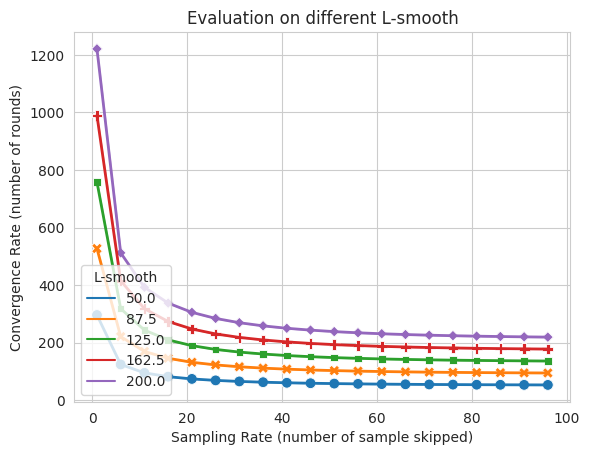

<ipython-input-2-645b43f0287a>:67: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-2-645b43f0287a>:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


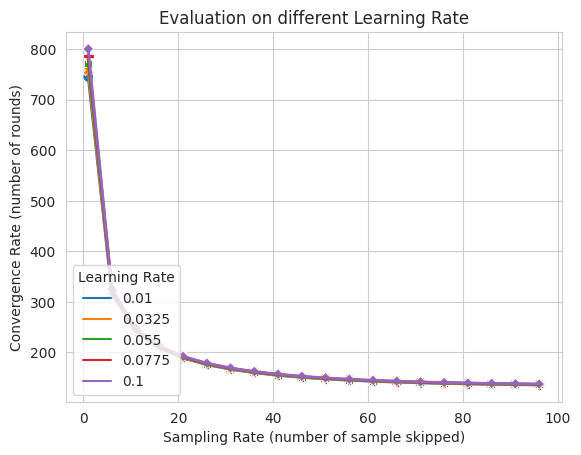

<ipython-input-2-645b43f0287a>:67: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-2-645b43f0287a>:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


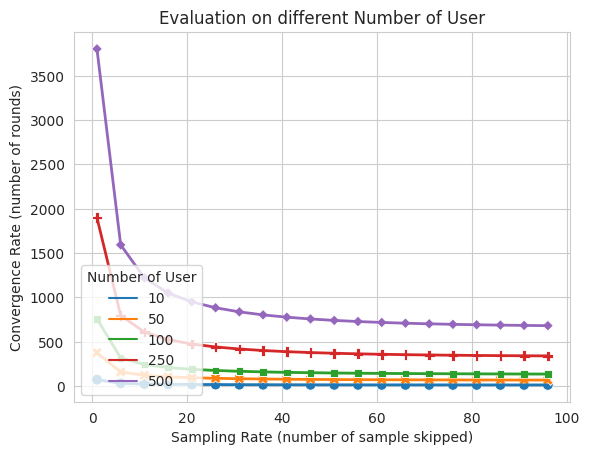

<ipython-input-2-645b43f0287a>:67: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-2-645b43f0287a>:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


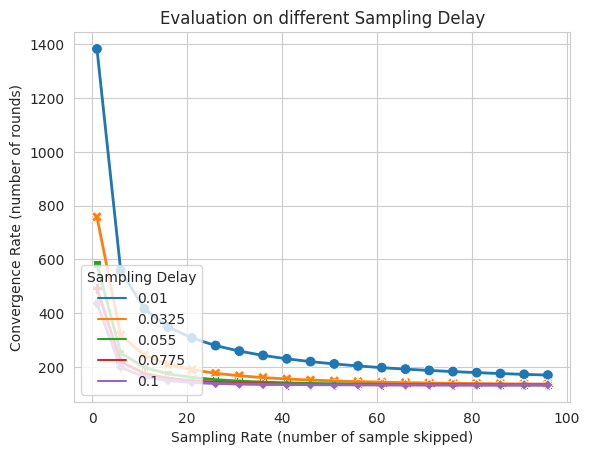

<ipython-input-2-645b43f0287a>:67: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-2-645b43f0287a>:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


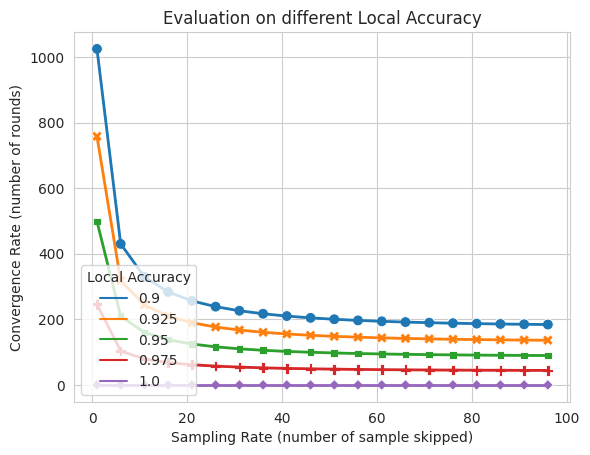

In [2]:
U_values = np.array([10, 50, 100, 250, 500, 100])       # Number of users
L_values = np.around(np.linspace(50, 200, 5),4)        # L-smooth | strongly convex
eta_values = np.around(np.linspace(0.01, 0.1, 5),4)     # learning rate
sample_values = np.arange(1, 100, 5)                    # sample skip
eps_values = np.around(np.linspace(0.9, 1, 5),4)        # local accuracy
tau_u_values = np.around(np.linspace(0.01, 0.1, 5),4)   # sampling delay

print(f"U_values: {U_values}")
print(f"L_values: {L_values}")
print(f"eta_values: {eta_values}")
print(f"sample_values: {sample_values}")
print(f"eps_values: {eps_values}")
print(f"tau_u_values: {tau_u_values}")

xi = 0.5               # Constaints
case_item = "train"
losses = []
for user in U_values:
    for L in L_values:
        for eta in eta_values:
            for s_skip in sample_values:
                for eps in eps_values:
                    for tau_u in tau_u_values:
                        min_round = scfl_convergence(U=user, L=L, mu=L, eta=eta, epsilon_0=eps, tau_u=tau_u, sample_skip=s_skip, xi=xi)
                        losses.append([user, L, eta, eps, tau_u, s_skip, min_round])

losses_df = pd.DataFrame(losses, columns=['Number of User', 'L-smooth', 'Learning Rate', 'Local Accuracy', 'Sampling Delay', 'Sampling Rate', 'Convergence Rate'])

colorset =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

key_draw_x = 'Sampling Rate'
key_draw_y = 'Convergence Rate'
key_list = ['L-smooth', 'Learning Rate', 'Number of User', 'Sampling Delay', 'Local Accuracy']
idx = random.randint(0, 4)

# {'L-smooth': 125.0, 'Learning Rate': 0.0325, 'Number of User': 50, 'Sampling Delay': 0.0325, 'Local Accuracy': 0.925}

# fixed_set = {
#     k: losses_df[k].unique()[idx]
#     for k in key_list
# }
# print(fixed_set)

fixed_set = {
    'L-smooth': 125,
    'Learning Rate': 0.0325,
    'Number of User': 100 ,
    'Sampling Delay': 0.0325,
    'Local Accuracy': 0.925
}

for key_idx, key in enumerate(key_list):
    # Fix the values of other variables randomly
    fixed_values = {
        k: fixed_set[k] if k != key else None
        for k in key_list
    }

    # Filter the DataFrame based on the fixed values
    filtered_df = losses_df.copy()
    for k, v in fixed_values.items():
        if v is not None:
            filtered_df = filtered_df[filtered_df[k] == v]

    sns.set_style("whitegrid")  # Turn on the grid
    sns.lineplot(
        x=key_draw_x,
        y=key_draw_y,
        data=filtered_df,
        hue=key_list[key_idx],
        linewidth=2,
        # linestyle='dashed',
        palette=colorset
        )
    sns.scatterplot(
        x=key_draw_x,
        y=key_draw_y,
        data=filtered_df,
        hue=key_list[key_idx],
        palette=colorset,
        style=key_list[key_idx],
        s=60,
        legend=False
        )
    plt.xlabel('Sampling Rate (number of sample skipped)')
    plt.ylabel('Convergence Rate (number of rounds)')
    plt.title(f'Evaluation on different {key_list[key_idx]}')
    values = losses_df[key_list[key_idx]].unique()
    legend_labels = [f'o={value}' for value in values]
    plt.legend(loc='lower left',fontsize='medium',title=key_list[key_idx])
    plt.savefig(f'{case_item}_plot_{key_list[key_idx]}.pdf', dpi=300)  # Save as PDF
    plt.show()

<ipython-input-64-4510eae0fda5>:43: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-64-4510eae0fda5>:52: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


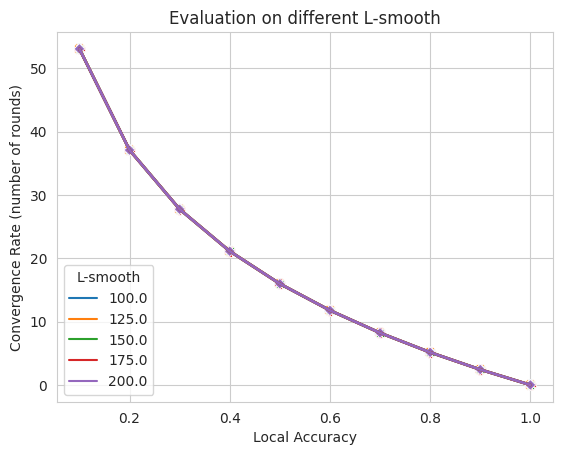

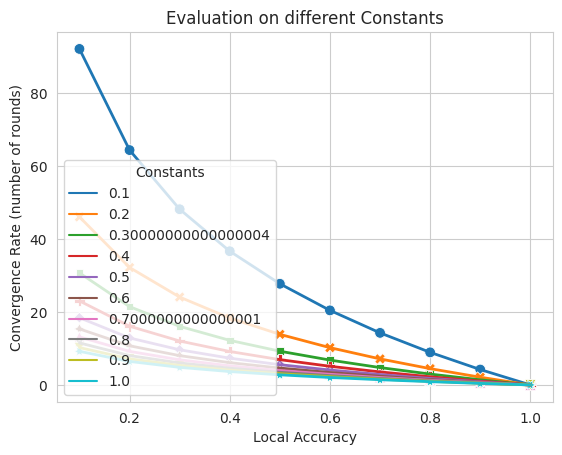

<ipython-input-64-4510eae0fda5>:43: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-64-4510eae0fda5>:52: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


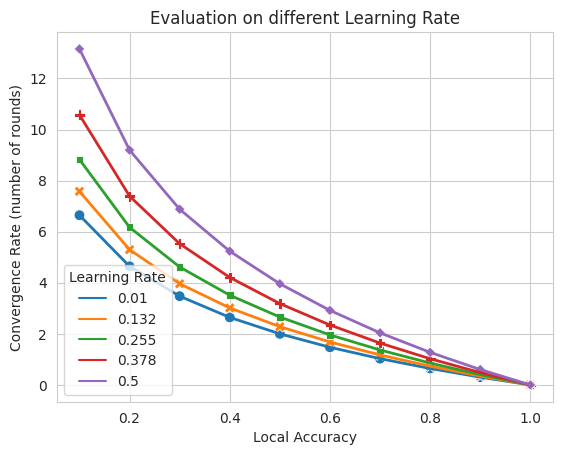

In [64]:
L_values = np.around(np.linspace(100, 200, 5),3)       # L-smooth | strongly convex
mu_values = np.around(np.linspace(50, 200, 5),3)      # sampling delay
eta_values = np.around(np.linspace(0.01, 0.5, 5),3)     # learning rate
xi_values = np.linspace(0.1, 1, 10)       # constant
eps_values = np.around(np.linspace(0.1, 1, 10),3)     # local accuracy

case_item = "train"
losses = []
for L in L_values:
    # for mu in mu_values:
    for eta in eta_values:
        for xi in xi_values:
            for eps in eps_values:
                min_round = zhy_convergence(L, L, xi, eps, eta)
                losses.append([L, L, xi,
                                eps, eta, min_round])

losses_df = pd.DataFrame(losses, columns=['L-smooth', 'Strongly Convex', 'Constants',
                                          'Local Accuracy', 'Learning Rate', 'Convergence Rate'])

colorset =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

key_draw_x = 'Local Accuracy'
key_draw_y = 'Convergence Rate'
key_list = ['L-smooth', 'Constants', 'Learning Rate']

# Iterate through key_list
for key_idx, key in enumerate(key_list):
    # Fix the values of other variables randomly
    fixed_values = {
        k: random.choice(losses_df[k].unique()) if k != key else None
        for k in key_list
    }

    # Filter the DataFrame based on the fixed values
    filtered_df = losses_df.copy()
    for k, v in fixed_values.items():
        if v is not None:
            filtered_df = filtered_df[filtered_df[k] == v]

    sns.set_style("whitegrid")  # Turn on the grid
    sns.lineplot(
        x=key_draw_x,
        y=key_draw_y,
        data=filtered_df,
        hue=key_list[key_idx],
        linewidth=2,
        # linestyle='dashed',
        palette=colorset
        )
    sns.scatterplot(
        x=key_draw_x,
        y=key_draw_y,
        data=filtered_df,
        hue=key_list[key_idx],
        palette=colorset,
        style=key_list[key_idx],
        s=60,
        legend=False
        )
    plt.xlabel('Local Accuracy')
    plt.ylabel('Convergence Rate (number of rounds)')
    plt.title(f'Evaluation on different {key_list[key_idx]}')
    values = losses_df[key_list[key_idx]].unique()
    legend_labels = [f'o={value}' for value in values]
    plt.legend(loc='lower left',fontsize='medium',title=key_list[key_idx])
    plt.show()